In [1]:
import pandas as pd
# permite que una misma celda imprima varios resultados
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import json

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
climate_change = pd.read_csv('/content/drive/My Drive/Tweeter/Datasets/climate-change_tweets.csv', engine='python')

In [4]:
#climate_change = pd.read_csv("climate-change_tweets.csv")
#climate_change.head()

In [5]:
print(len(climate_change))
print(len(climate_change["tweet.full_text"].unique()))

703486
787


# Cobertura

In [6]:
print(len(climate_change["tweet.full_text"]))
print(len(climate_change["tweet.full_text"].dropna()))

703486
1302


#### 1ra cobertura

In [7]:
def get_text(tweet):
    if tweet["tweet.retweeted_status.text"] == tweet["tweet.retweeted_status.text"]:
        return tweet["tweet.retweeted_status.text"]
    else:
        return tweet["tweet.full_text"]

In [8]:
climate_change["full_text"] = climate_change.apply(get_text, axis=1)

In [9]:
print(len(climate_change["tweet.full_text"]))
print(len(climate_change["full_text"].dropna()))

703486
494528


Veamos los tweets que aún nos aparecen como NaN en la columna full_text para ver a dónde podemos encontrar el texto de ese tweet:

In [10]:
climate_change_filt1 = climate_change[climate_change['full_text'].isnull()]
climate_change_filt1.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text
1,ObjectId(5dfd3d4d74e5f1ecede595b4),streaming,Fri Dec 20 21:29:44 +0000 2019,1208137432711008266,NaN,"Staples, Utilities, and Energy (with oil down) all strong today. Vix finished green by a hair. \n\nWhat a time to be alive.",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",998910748054179840,Wait Capital,WaitCapital,"Austin, TX",False,1283,210,43,NaN,11003,Tue May 22 12:57:35 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,ObjectId(5dfd3d5274e5f1ecede59761),streaming,Fri Dec 20 21:29:49 +0000 2019,1208137450780086273,NaN,"@JustinTrudeau if you’re going ahead with this plan, I hope EV’s get exempted from this tax! 🇨🇦 \n\nEV’s are typicall… https://t.co/v0VAKv3gc1","@JustinTrudeau if you’re going ahead with this plan, I hope EV’s get exempted from this tax! 🇨🇦 \n\nEV’s are typically considered more expensive luxury items. Further burdens would dissuade consumers who are showing a growing interest in the products! \n\n#cdnpoli #ClimateChange",NaN,"{""hashtags"":[],""urls"":[{""url"":""https://t.co/v0VAKv3gc1"",""expanded_url"":""https://twitter.com/i/web/status/1208137450780086273"",""display_url"":""twitter.com/i/web/status/1…"",""indices"":[117,140]}],""user_mentions"":[{""screen_name"":""JustinTrudeau"",""name"":""Justin Trudeau"",""id"":14260960,""id_str"":""14260960"",""indices"":[0,14]}],""symbols"":[]}",723140310554038272,Tom H,humourme1234,"Barrie, Ontario",False,2331,1270,33,NaN,23638,Thu Apr 21 13:24:20 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ObjectId(5dfd3d5274e5f1ecede59763),streaming,Fri Dec 20 21:29:49 +0000 2019,1208137451530674176,NaN,Just a bit bloody late mate! Like at Least a decade!,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",715626890,Lynda Lee,Leel06Lee,Nrthrn Tblnds NSW,False,2625,3128,381,NaN,327579,Wed Jul 25 06:56:15 +0000 2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,ObjectId(5dfd3d5774e5f1ecede598ef),streaming,Fri Dec 20 21:29:54 +0000 2019,1208137474154942467,NaN,"For making a Christian case for combating climate change, Texas Tech’s Katharine Hayhoe is a finalist for Texan of… https://t.co/IDDlPSDgAK","For making a Christian case for combating climate change, Texas Tech’s Katharine Hayhoe is a finalist for Texan of the Year https://t.co/j1QUL6pzAF",NaN,"{""hashtags"":[],""urls"":[{""url"":""https://t.co/IDDlPSDgAK"",""expanded_url"":""https://twitter.com/i/web/status/1208137474154942467"",""display_url"":""twitter.com/i/web/status/1…"",""indices"":[116,139]}],""user_mentions"":[],""symbols"":[]}",989218016255709186,juju,jjsmokkieBOY57,"Texas, USA",False,25055,24930,16,NaN,93366,Wed Apr 25 19:02:08 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1

Si bien hay muchos que tienen NaN en la columna tweet.extended_tweet.full_text, nos conviene primero combinar full_text con esta para que no nos queden los tweets cortados

#### 2da cobertura

In [11]:
def get_text2(tweet):
    if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:  
        return tweet["tweet.extended_tweet.full_text"]
    else:
        return tweet["full_text"]

Nota: Voy a ir agregando una nueva columna por cada una de estas funcioncitas para ir viendo que vaya todo bien, después dejamos una sola

In [12]:
climate_change["full_text2"] = climate_change.apply(get_text2, axis=1)

In [13]:
print(len(climate_change["tweet.full_text"]))
print(len(climate_change["full_text2"].dropna()))

703486
608325


Veamos de vuelta los tweets que aún no tienen el texto en full_text2

In [14]:
climate_change_filt2 = climate_change[climate_change['full_text2'].isnull()]
climate_change_filt2.head()

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2
1,ObjectId(5dfd3d4d74e5f1ecede595b4),streaming,Fri Dec 20 21:29:44 +0000 2019,1208137432711008266,NaN,"Staples, Utilities, and Energy (with oil down) all strong today. Vix finished green by a hair. \n\nWhat a time to be alive.",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",998910748054179840,Wait Capital,WaitCapital,"Austin, TX",False,1283,210,43,NaN,11003,Tue May 22 12:57:35 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ObjectId(5dfd3d5274e5f1ecede59763),streaming,Fri Dec 20 21:29:49 +0000 2019,1208137451530674176,NaN,Just a bit bloody late mate! Like at Least a decade!,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",715626890,Lynda Lee,Leel06Lee,Nrthrn Tblnds NSW,False,2625,3128,381,NaN,327579,Wed Jul 25 06:56:15 +0000 2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,ObjectId(5dfd3d5f74e5f1ecede59aa5),streaming,Fri Dec 20 21:30:02 +0000 2019,1208137505662554112,NaN,As they’re climate change protestors you should never take it they won’t be stupid.,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",383976327,Paul 🔱#Sovereign,1961_Paul,The Forbidden Zone.,False,4171,4780,76,NaN,132276,Sun Oct 02 21:04:56 +0000 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,ObjectId(5dfd3d6874e5f1ecede59ca4),streaming,Fri Dec 20 21:30:11 +0000 2019,1208137545881546753,NaN,@TemplestKinqsly @Kaldrave @Don_Trower @ZonePhysics @GretaThunberg No worries. :),NaN,"[67,81]","{""hashtags"":[],""urls"":[],""user_mentions"":[{""screen_name"":""TemplestKinqsly"",""name"":""The Beef Of Willingtons ❌⭕️"",""id"":354803675,""id_str"":""354803675"",""indices"":[0,16]},{""screen_name"":""Kaldrave"",""name"":""Michael Tuttobene"",""id"":{""$numberLong"":""3193687926""},""id_str"":""3193687926"",""indices"":[17,26]},{""screen_name"":""Don_Trower"",""name"":""Don Trower"",""id"":{""$numberLong"":""1061224490502369280""},""id_str"":""1061224490502369280"",""indices"":[27,38]},{""screen_name"":""ZonePhysics"",""name"":""Physics \u0026 Astronomy Zone🔭"",""id"":{""$numberLong"":""934281246435405824""},""id_str"":""934281246435405824"",""indices"":[39,51]},{""screen_name"":""GretaThunberg"",""name"":""Greta Thunberg"",""id"":{""$numberLong"":""1006419421244678144""},""id_str"":""1006419421244678144"",""indices"":[52,66]}],""symbols"":[]}",277095408,uninspired.,noxidls,NaN,False,231,1558,1,NaN,3897,Mon Apr 04 17:52:13 +0000 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,ObjectId(5dfd3d6f74e5f1ecede59d30),streaming,Fri Dec 20 21:30:18 +0000 2019,1208137572347723778,NaN,@rebleber More coverage from climate change activists in Africa and the consequences that people are dealing with,NaN

#### 3ra cobertura

In [15]:
climate_change["full_text2"] = climate_change["full_text2"].fillna(0)
climate_change['category'] = np.where(climate_change.full_text2 == 0 , 0, 1)
climate_change['full_text2'] = np.where(climate_change['category'] == 0, climate_change['tweet.text'], climate_change['full_text2'])

In [16]:
print(len(climate_change["tweet.full_text"]))
print(len(climate_change["full_text2"].dropna()))

703486
703486


# Grafo

Nos quedamos con los tweets que son retweets

In [17]:
retweets = climate_change.dropna(subset=["tweet.retweeted_status.user.id_str"]) #Subset lo que hace es me elimina la fila si el nan está en la columna que le paso como parámetro
len(retweets["tweet.retweeted_status.user.id_str"])

494161

Código para armar el grafo:

In [18]:
full_g = nx.Graph()
vertex_ids = set()


for user1, user2 in zip(retweets["tweet.user.id_str"], retweets["tweet.retweeted_status.user.id_str"]):
    full_g.add_edge(user1, user2)

Estadística del grafo:

In [19]:
n = len(full_g.nodes)
m = len(full_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))

Nodos: 306950
Ejes: 457813


Gráfico de nodos de acuerdo a su grado:

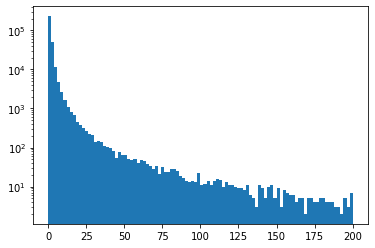

In [20]:
degrees = np.array([full_g.degree(node) for node in full_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=100);
plt.semilogy();

Recortamos el grafo para quedarnos con los nodos "influencers":

In [21]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [22]:
g = subgraph_strong_nodes(full_g, 5)

print("Nos quedan {:.2f}M nodos (antes eran {:.2f}M)".format(
    len(g.nodes) / 1e6,
    len(full_g.nodes) / 1e6
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 0.02M nodos (antes eran 0.31M)
Componentes conexas = 1930


Cantidad de usuarios en las componentes conexas

In [23]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} usuarios".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} usuarios".format(sum(resto)))

Componentes conexas = 1930
Componente 0  --> 18337  usuarios
Restantes     --> 2065   usuarios


Nos quedamos solo con la componente más significativa:

In [24]:
g = g.subgraph(components[0])

### Ejercicio 5

In [25]:
def tienenMasDeNEnComun(tweet1, tweet2, n):
    t1 = set(tweet1.split(" "))
    t2 = set(tweet2.split(" "))
    return len(t1.intersection(t2)) > n

In [26]:
print(len(climate_change))
print(len(climate_change["full_text2"].unique()))

703486
260804


In [27]:
no_retweets = climate_change[climate_change["tweet.retweeted_status.user.id_str"].isnull()]
no_retweets.shape
no_retweets.head()

(209325, 43)

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.location,tweet.user.verified,tweet.user.followers_count,tweet.user.friends_count,tweet.user.listed_count,tweet.user.favorites_count,tweet.user.statuses_count,tweet.user.created_at,tweet.user.following,tweet.retweet_status,tweet.retweeted_status.created_at,tweet.retweeted_status.id_str,tweet.retweeted_status.text,tweet.retweeted_status.user.id_str,tweet.retweeted_status.user.name,tweet.retweeted_status.user.screen_name,tweet.retweeted_status.user.location,tweet.retweeted_status.user.verified,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text,full_text2,category
1,ObjectId(5dfd3d4d74e5f1ecede595b4),streaming,Fri Dec 20 21:29:44 +0000 2019,1208137432711008266,NaN,"Staples, Utilities, and Energy (with oil down) all strong today. Vix finished green by a hair. \n\nWhat a time to be alive.",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""symbols"":[]}",998910748054179840,Wait Capital,WaitCapital,"Austin, TX",False,1283,210,43,NaN,11003,Tue May 22 12:57:35 +0000 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Staples, Utilities, and Energy (with oil down) all strong today. Vix finished green by a hair. \n\nWhat a time to be alive.",0
2,ObjectId(5dfd3d4e74e5f1ecede595b8),Climate change,Fri Dec 20 21:29:47 +0000 2019,1208137443125288960,"@AshGhebranious @firstdogonmoon @fran_b__ @KetanJ0 The Australian and other Murdoch publications are now total propaganda. Spread ""alternative facts"" using bought pseudo scientists and rabid opinion writers, and launch vicious personal attacks on everyone calling for action on climate change. I block them.",NaN,NaN,"[51,308]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{""screen_name"":""AshGhebranious"",""name"":""Ashraffy"",""id"":176749827,""id_str"":""176749827"",""indices"":[0,15]},{""screen_name"":""firstdogonmoon"",""name"":""F Onthemoon"",""id"":14879825,""id_str"":""14879825"",""indices"":[16,31]},{""screen_name"":""fran_b__"",""name"":""BandieraRossa #OustTheBitterites #TakeThePledge"",""id"":48673284,""id_str"":""48673284"",""indices"":[32,41]},{""screen_name"":""KetanJ0"",""name"":""Ketan Joshi"",""id"":420100653,""id_str"":""420100653"",""indices"":[42,50]}],""urls"":[]}",16996451,💧 Peter Campbell,peterc_150,Australia,False,1544,3425,73,NaN,40688,Mon Oct 27 11:22:50 +0000 2008,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@AshGhebranious @firstdogonmoon @fran_b__ @KetanJ0 The Australian and other Murdoch publications are now total propaganda. Spread ""alternative facts"" using bought pseudo scientists and rabid opinion writers, and launch vicious personal attacks on everyone calling for action on climate change. I block them.","@AshGhebranious @firstdogonmoon @fran_b__ @KetanJ0 The Australian and other Murdoch publications are now total propaganda. Spread ""alternative facts"" using bought pseudo scientists and rabid opinion writers, and launch vicious personal attacks on everyone calling for action on climate change. I block them.",1
5,ObjectId(5dfd3d4e74e5f1ecede595c2),Climate change,Fri Dec 20 21:29:46 +0000 2019,1208137438268444673,#Dutch court #rules people have a fundamental #right to be protected from #climatechange https://t.co/m9nOnetBKy,NaN,NaN,"[0,113]","{""hashtags"":[{""text"":""Dutch"",""indices"":[0,6]},{""text"":""rules"",""indices"":[13,19]},{""text"":""right"",""indices"":[46,52]},{""text"":""climatechange"",""ind

In [28]:
#Codigo original, se duplican las comparaciones entre los tweets
tweet_g = nx.Graph()
vertex_ids = set()
result = []

for tweet1 in no_retweets["full_text2"][:1000]:
    for tweet2 in no_retweets["full_text2"][:1000]:
      if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
        #Se agrego este result.append para revisar cuantas comparaciones se estan realizando.
        result.append(str(tweet1)+","+str(tweet2))
        tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion actual: "+str(len(result)))  

Nodos: 153
Ejes: 218
Total de iteraciones resultado funcion actual: 452


In [29]:
#Codigo un poco mas eficiente. No repite las comparaciones de tweets.
tweet_g = nx.Graph()
vertex_ids = set()

#Variable auxiliar para ver cuantas comparaciones se estan haciendo al final del ultimo if
result = []

#Indice para tweet1
i = 0

#Indice para tweet2
j = 0

for tweet1 in no_retweets["full_text2"][:1000]:
  i+= 1
  j = 0
  for tweet2 in no_retweets["full_text2"][:1000]:
    j+= 1
    if i != j and i < j :
        if(tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
          result.append(str(tweet1)+","+str(tweet2))
          tweet_g.add_edge(tweet1,tweet2)   

n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))         
print("Total de iteraciones resultado funcion mejorada: "+str(len(result)))


Nodos: 153
Ejes: 218
Total de iteraciones resultado funcion mejorada: 226


Podemos observar que tanto la funcion mejorada como el código original, dan el mismo resultado de grafos. Sin embargo el segundo bloque es más eficiente, ya que realiza la mitad de comparaciones lógicas para obtener los resultados. Entiendo que al armar los nodos, si los mismos estan repetidos, en realidad se estan sobreescribiendo, por lo cual el resultado no se modifica.

#### Comenzamos a generar un nuevo Grafo con mayor cantidad de Tweets para obtener mejores resultados

In [30]:
# Mismo codigo anterior con identico resultado, solo que se utilizan de forma diferente los incrementales en la iteracion
import networkx as nx

tweet_g = nx.Graph()
vertex_ids = set()

i=0
j=0
for tweet1 in no_retweets["full_text2"][:10000]:
    for tweet2 in no_retweets["full_text2"][i:10000]:
        if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
            tweet_g.add_edge(tweet1,tweet2)  
            j+=1
    i+=1


n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))
print("Total de iteraciones resultado funcion mejorada: "+str(j))

Nodos: 2463
Ejes: 12008
Total de iteraciones resultado funcion mejorada: 12106


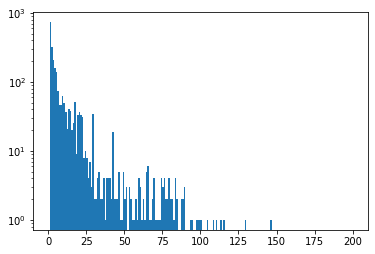

In [31]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

degrees = np.array([tweet_g.degree(node) for node in tweet_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=200);
plt.semilogy();

De acuerdo al grafico anterior, observamos que tenemos casi 1000 tweets con tan solo una arista, y que tenemos 1 solo tweet con casi 150 aristas.

Recortamos el Grafo, quitando los nodos con menos de 3 aristas.

In [32]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [37]:
g = subgraph_strong_nodes(tweet_g, 5)

print("Nos quedan {:.2f} nodos (antes eran {:.2f})".format(
    len(g.nodes),
    len(tweet_g.nodes)
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 1041.00 nodos (antes eran 2463.00)
Componentes conexas = 34


In [38]:
print(nx.number_connected_components(g))

34


In [46]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} tweets".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} tweets".format(sum(resto)))
print("Mayor componente conexa del resto = {}".format(max(resto)))

Componentes conexas = 34
Componente 0  --> 685    tweets
Restantes     --> 356    tweets
Mayor componente conexa del resto = 23


In [36]:
g = g.subgraph(components[0])